The goal of this project is to make a difference between real and fake news with python. Using sklearn, a <br>TfidfVectorizer on the dataset will be built. Then, a PassiveAggressiveClassifier will be initialized and used to fit the model. Finally, the accuracy score and the confusion matrix will evaluate how well this model is. <br><br>
Two algorithms will be used right here: TfidfVectorizer and PassiveAggerssiveClassifier<br>
(1) The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features<br>
(2) Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains
   passive for a<br> correct classification outcome, and turns aggressive in the event of a
   miscalculation, updating, and <br>adjusting. Unlike most other algorithms, it does not converge.
   Its purpose is to make updates that correct the loss, causing very little change in the norm
   of the weight vector



In [85]:
"""
1. Import required libraries
"""
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,\
     precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [67]:
"""
2. Read the data into a DataFrame, and gget the shape of the data and the first 5 records
Dataset:news.csv, which has a shape 6335x4. The four attributes respectively are news_id, 
title, text, and labels denoting if the news is REAL or FAKE
"""
# Read the data
news_data = pd.read_csv('news.csv')

# Get the shape
news_data.shape

(6335, 4)

In [68]:
# Get the head (the first five lines)
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [69]:
# Get the labels from the DataFrame
labels = news_data.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [70]:
"""
5.Split the dataset into training and testing sets. Use text of news as the model's inputs, labels of news as the model's outputs
"""
x_train, x_test, y_train, y_test = train_test_split(news_data['text'], labels, test_size=0.2, random_state=7)

In [78]:
"""
6.TfidfVectorizer initialization, the following settings in the codes aim to stop words from English language and 
discard terms with a high document frequency over 0.7. This words filtering process will be done before processing
the natural language data. A TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features
"""
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

"""
7.PassiveAggressiveClassifier Initialization
"""
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predict on the testing dataset and calculate accuracy
y_pred = pac.predict(tfidf_test)

# Create an encoder converting string labels into digital ones
encoder = LabelEncoder()
y_test_encoding = encoder.fit_transform(y_test)
y_pred_encoding = encoder.fit_transform(y_pred)

# Calculate the accuracy of this model
score = accuracy_score(y_test_encoding, y_pred_encoding)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 93.05%


In [79]:
# Build a confusion matrix
confusion_matrix(y_test_encoding, y_pred_encoding)

array([[592,  46],
       [ 42, 587]], dtype=int64)

In [80]:
# Precision score of the model
precision_score(y_test_encoding, y_pred_encoding)

0.9273301737756714

In [81]:
# Recall score of the model
recall_score(y_test_encoding, y_pred_encoding)

0.9332273449920508

In [82]:
# F1 score of the model
f1_score(y_test_encoding, y_pred_encoding)

0.93026941362916

In [83]:
# ROC AUC of the model
roc_auc_score(y_test_encoding, y_pred_encoding)

0.9305635157562135

(0.0, 1.0, 0.0, 1.0)

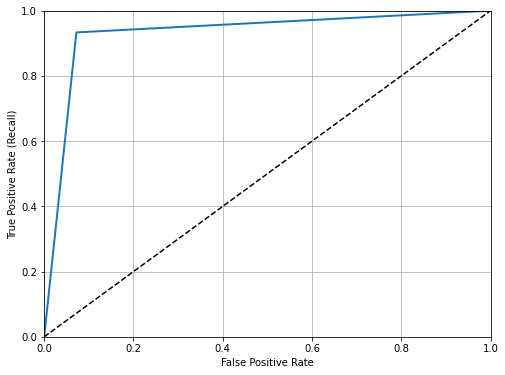

In [89]:
# ROC curve

# Getting the value sets of False Positive Rate (FPR), True Positive Rate (TPR), 
# and thresholds (for various decision scores)
fpr, tpr, thresholds = roc_curve(y_test_encoding, y_pred_encoding)  
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal 
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.axis([min(fpr), max(fpr), min(tpr), max(tpr)])